In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
train = pd.read_csv("bigmart_train.csv")

In [3]:
train.shape

(8523, 12)

In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# 결측치 Item_Weight, Outlet_Size 
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
# interpolate : 데이터의 값에 선형으로 비례하는 방식으로 결측치에 값을 넣음
train['Item_Weight'].interpolate(inplace=True)
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# mode()[0] 최빈값으로 채우기, 0번째 index지정하여 추출
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace= True)
train['Outlet_Size'].isna().sum()

0

In [8]:
# 매 해 숫자가 비슷함
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [9]:
# int를 object 타입으로 변경
# 그래프에서 Outlet_Establishment_Year을 사용하지 않기 위해
train['Outlet_Establishment_Year']= train.Outlet_Establishment_Year.astype('object')

(<seaborn.axisgrid.PairGrid at 0x1e920188ca0>,
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'])

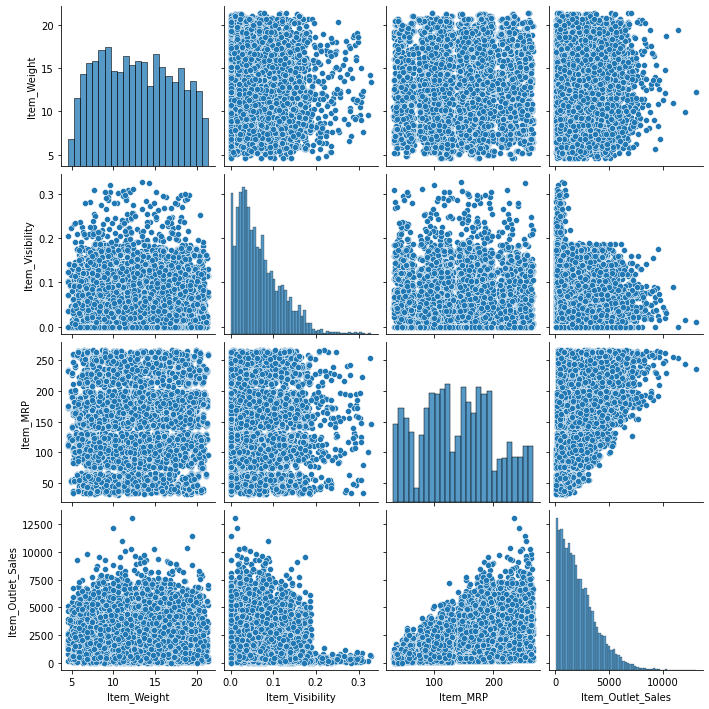

In [10]:
# 숫자 데이터 추출 , 좀 더 의미있는 데이터
# * : unpacking 
# train.select_dtypes(['int64', 'float64',])인 컬럼을 선택
cols = [*train.select_dtypes(['int64', 'float64']).columns]
sns.pairplot(train[cols]), cols

In [11]:
cols.remove('Item_Outlet_Sales')
cols

['Item_Weight', 'Item_Visibility', 'Item_MRP']

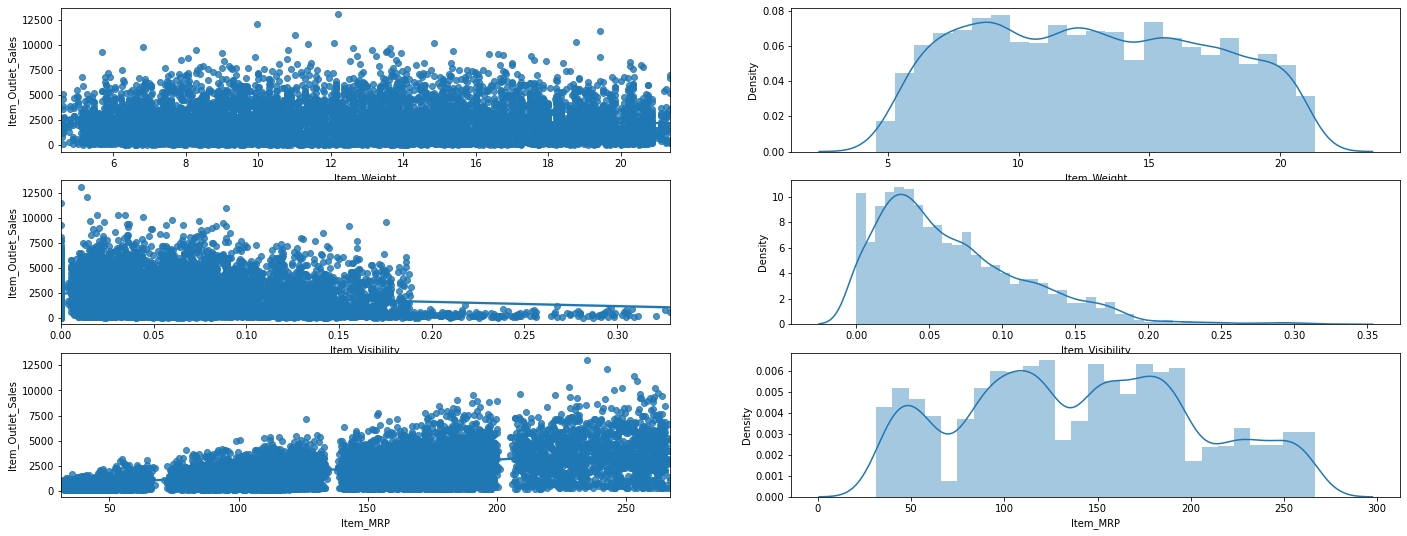

In [12]:
plt.figure(figsize= (24, 9))
count = 1
for col in cols:
    plt.subplot(3, 2, count)
    sns.regplot(x=col, y='Item_Outlet_Sales', data=train)
    plt.xlabel(col)
    count += 1
    plt.subplot(3, 2, count)   
    sns.distplot(train.loc[train[col].notnull(), col])
    count += 1

In [13]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [14]:
# object 데이터를 가진 컬럼 선택
obj_cols = [*train.select_dtypes('object').columns]
obj_cols

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [15]:
# value_counts를 하는데, value가 많은 컬럼은 빼고 print
for col in obj_cols:
    if train[col].nunique() <= 10:
        print(train[col].value_counts())
    else:
        print(col, train[col].nunique())

Item_Identifier 1559
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type 16
OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
1985    1463
1987     932
1997     930
1999     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [16]:
# Item_Fat_Content에 중복된 값(Low Fat, low fat, LF, Regular, reg)이 있음
# Low Fat, Regular 두 개로 통합
train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [17]:
# 위 자료에서 Item_Identifier 컬럼에 1559개의 unique value가 있는데 전체 데이터는 8천개이다
# 어떤 종류, 패턴이 있는지 확인
train['Item_Identifier'].str[:3].value_counts() # 앞에서 3글자를 봐도 71종류가 있다.
train['Item_Identifier'].str[:2].value_counts() # 두 글자만 해보니 3종류로 줄었다.

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [18]:
# 데이터 바꾸기
train['Item_Identifier'] = train['Item_Identifier'].str[:2]

In [19]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


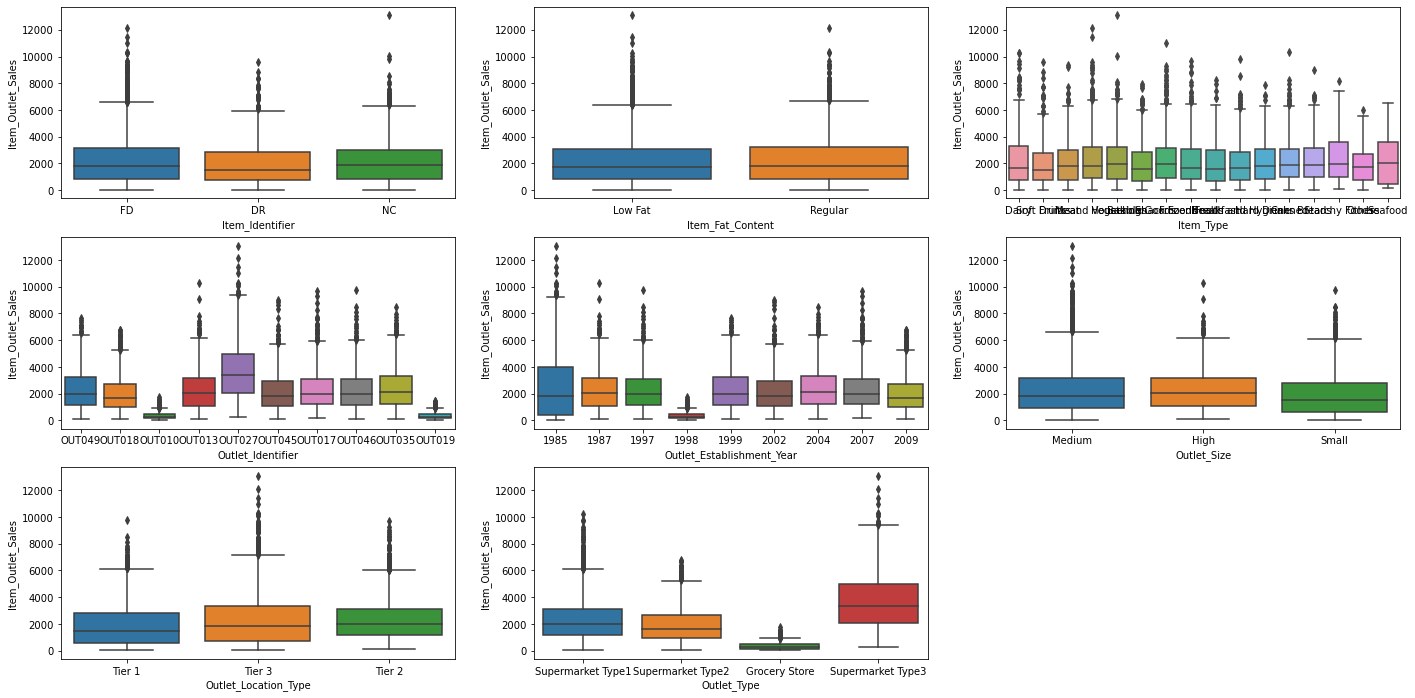

In [20]:
plt.figure(figsize= (24, 12))
for idx, col in enumerate(obj_cols):
    plt.subplot(3, 3, idx+1)
    sns.boxplot(col, 'Item_Outlet_Sales', data= train)

In [21]:
pd.get_dummies

<function pandas.core.reshape.reshape.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None) -> 'DataFrame'>

In [22]:
# pd.get_dummies : one-hot encoding을 수행 
# (범주의 개수만큼 variable을 만들어 0또는 1을 할당함, 새로운 특성으로 바꾸는 함수)
df = pd.get_dummies(train, drop_first=True)
df.shape

(8523, 46)

In [23]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [24]:
# cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
for col in cols:
    print("min-", col, train[col].min())
    print("max-", col, train[col].max())

min- Item_Weight 4.555
max- Item_Weight 21.35
min- Item_Visibility 0.0
max- Item_Visibility 0.328390948
min- Item_MRP 31.29
max- Item_MRP 266.8884


In [25]:
# Item_Visibility에서 0인 값을 1로 바꾸고 아닌 것은 그대로(0) Non-Visible로 만든다.
df['Non-Visible'] = np.where(df['Item_Visibility']==0, 1, 0)
df['Non-Visible'].value_counts()

0    7997
1     526
Name: Non-Visible, dtype: int64

In [26]:
df.head(4)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Non-Visible
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,...,0,1,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [27]:
df.isna().sum().sum()
# 결측치 없음

0

In [28]:
df.shape

(8523, 47)

In [29]:
# X는 Item_Outlet_Sales를 제외한 데이터, y는 예측해야할 데이터 Item_Outlet_Sales
X, y = df.drop('Item_Outlet_Sales', axis=1), df.Item_Outlet_Sales

In [30]:
X.shape, y.shape

((8523, 46), (8523,))

In [31]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2022
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6818, 46), (1705, 46), (6818,), (1705,))

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_mse

1312426.8254420862

In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mse

1278415.7738741129

In [35]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mse

2415345.5558664184

In [36]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_pred)
xgb_mse

1348759.6492807015

In [37]:
# 비교
df = pd.DataFrame({
    'y_test':y_test, 'LR':lr_pred, 'RF':rf_pred, 'SVR':svr_pred, 'XGB':xgb_pred
})
df.head(10)

,y_test,LR,RF,SVR,XGB
4714,2508.7344,3413.132306,4400.265542,2382.502735,3453.353760
1137,1966.7732,2434.028032,2266.070274,1893.628049,2335.363525
2590,842.2370,368.756173,457.085016,1197.665821,340.314117
7387,657.8104,657.818128,411.504348,2100.190787,490.425476
1822,1404.8380,2182.810088,2039.731564,1896.291757,2056.052490
8264,3705.1770,2886.050848,3859.635942,2182.390810,3204.402832
3877,1777.6860,1651.094270,1748.803596,1721.025736,1671.433472
2738,1861.5768,2505.669395,2647.740124,2019.299357,2403.525146
6734,539.2980,1130.691639,1655.172142,1284.248424,1025.114258
5194,3946.8624,4040.151773,4356.655642,2088.698913,4488.011719


In [38]:
print(f'LR: {lr_mse:.4f}, RF: {rf_mse:.4f}, SVR: {svr_mse:.4f}, XGB: {xgb_mse}')

LR: 1312426.8254, RF: 1278415.7739, SVR: 2415345.5559, XGB: 1348759.6492807015


In [39]:
print(f'lr: {lr.score(X_test,y_test)}, rf:{rf.score(X_test,y_test)}, svr:{svr.score(X_test,y_test)}')

lr: 0.5559152699187639, rf:0.5674235600287705, svr:0.18272161278893084
